In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
train = pd.read_csv("train.csv")

original = pd.read_csv("bank-full.csv", sep=";")
original['y'] = original['y'].apply(lambda x: 1 if x=="yes" else 0)

In [63]:
# Step 1: Concatenate original + synthetic
train = pd.concat([train, original], ignore_index=True)

# Step 2: Categorical columns
cat_cols = original.select_dtypes(include=['object']).columns

# Step 3: Compute target means from original, and map to full train
for col in cat_cols:
    te_map = original.groupby(col)['y'].mean().to_dict()  # mean target per category
    train[col + "_mean"] = train[col].map(te_map)         # apply to full train
    train.drop(columns=[col], inplace=True)

In [24]:
# returns a DataFrame: rows = day, columns = class (0/1), values = fraction
fractions = (
    original
      .groupby('day')['y']               # group the target by day
      .value_counts(normalize=True)      # fraction of each class within the group
      .unstack(fill_value=0)             # columns 0 and 1 side-by-side
)


In [10]:
input_days = np.linspace(0,31,200)
sin_wave = 0.065 * np.sin((input_days-2) * (2 * np.pi / 7)) + 0.13

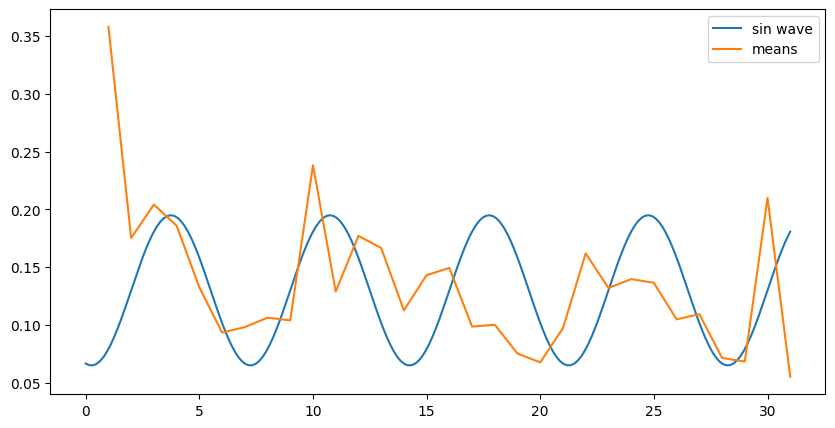

In [13]:
fig, ax = plt.subplots(figsize=(10,5))


plt.plot(input_days, sin_wave, label = 'sin wave')
plt.plot(means, label = 'means')

plt.legend()
plt.show()

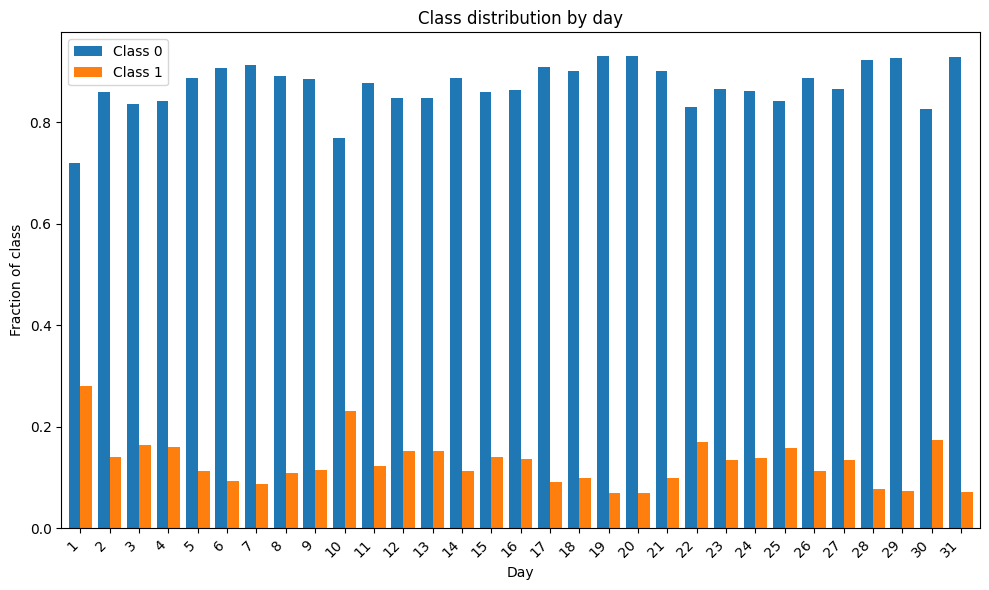

In [25]:
import matplotlib.pyplot as plt

ax = fractions[[0, 1]].plot(
    kind='bar',
    width=0.8,          # bar width; <1 leaves space between day groups
    figsize=(10, 6)
)

ax.set_xlabel('Day')
ax.set_ylabel('Fraction of class')
ax.set_title('Class distribution by day')
ax.legend(labels=['Class 0', 'Class 1'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


---

In [56]:
[(train['pdays'] > 86) & (train['pdays'] < 94)].apply(lambda x: x)

AttributeError: 'list' object has no attribute 'apply'

In [64]:
train['pdays_qtr_yr'] = ((train['pdays'] > 86) & (train['pdays'] < 94)).astype(int)
train['pdays_hlf_yr'] = ((train['pdays'] > 178) & (train['pdays'] < 187)).astype(int)
train['pdays_fl_yr'] = ((train['pdays'] > 361) & (train['pdays'] < 369)).astype(int)
train['pdays_mor_yr'] = ((train['pdays'] > 370)).astype(int)
train['pdays_none'] = (train['pdays'] == -1).astype(int)

In [65]:
train

,id,age,balance,day,duration,campaign,pdays,previous,y,job_mean,...,housing_mean,loan_mean,contact_mean,month_mean,poutcome_mean,pdays_qtr_yr,pdays_hlf_yr,pdays_fl_yr,pdays_mor_yr,pdays_none
0,0.0,42,7,25,117,3,-1,0,0,0.110570,...,0.167024,0.126557,0.149189,0.110133,0.091615,0,0,0,0,1
1,1.0,38,514,18,185,1,-1,0,0,0.072750,...,0.167024,0.126557,0.040707,0.102228,0.091615,0,0,0,0,1
2,2.0,36,602,14,111,2,-1,0,0,0.072750,...,0.077000,0.126557,0.040707,0.067195,0.091615,0,0,0,0,1
3,3.0,27,34,28,10,2,-1,0,0,0.286780,...,0.077000,0.126557,0.040707,0.067195,0.091615,0,0,0,0,1
4,4.0,26,889,3,902,1,-1,0,1,0.110570,...,0.077000,0.126557,0.149189,0.166478,0.091615,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795206,NaN,51,825,17,977,3,-1,0,1,0.110570,...,0.167024,0.126557,0.149189,0.101511,0.091615,0,0,0,0,1
795207,NaN,71,1729,17,456,2,-1,0,1,0.227915,...,0.167024,0.126557,0.149189,0.101511,0.091615,0,0,0,0,1
795208,NaN,72,5715,17,1127,5,184,3,1,0.227915,...,0.167024,0.126557,0.149189,0.101511,0.647253,0,1,0,0,0
795209,NaN,57,668,17,508,4,-1,0,0,0.072750,...,0.167024,0.126557,0.134205,0.101511,0.091615,0,0,0,0,1
